# Logistic Regression


## Suad Emre UMAR



## Table of Contents
***
* [1. Introduction](#c) <br>
* [2. Importing dataset and data preprocessing](#2) <br>
* [3. Normalization ](#3) <br>
* [4. Logistic Regression](#4) <br>
  * [4.1. Train Test Split](#4.1) <br>
  * [4.2. Parameter Initialize and Sigmoid Function](#4.2) <br>
  * [4.3. Forward & Backward Propagation](#4.3) <br>
  * [4.4. Updating(learning) Parameters](#4.4) <br>
  * [4.5. Predict](#4.5) <br>
  * [4.6. Logistic Regression](#4.6) <br>
  * [4.7. Logistic Regression with sklearn](#4.7) <br>
* [5.Conclusion](#5) <br>    

## 1.Introduction
<a id="c"></a>
In this kernel, i will work on Logistic Regression.
### What is the Logistic Regression
* When data have binary classification (outputs : 0 or 1), we can use logistic regression.
* Logistic regression is a predictive analysis.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['voice.csv']


## 2.Importing dataset and data preprocessing
<a id="2"></a>

* First of all i am looking to data.
* I am cheching the colums and i must drop the columns which is not relating with my predictions.
* If i use the unusefuly columns on my Logistics model,it negatively affects on model.
* Then i will determinate to x,y values


In [2]:
data = pd.read_csv("../input/voice.csv")

In [3]:
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.8+ KB


In [5]:
data.label.value_counts()

male      1584
female    1584
Name: label, dtype: int64

* I want to put boundry like female : 0 , male : 1
* Weil The model can determine which data belongs to which class (0 or 1).

In [6]:
data.label = [0 if each=='female' else 1 for each in data.label]

In [7]:
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


In [8]:
# I determined x and y
# y : outputs 
# x : features
y = data.label.values
x_data = data.drop(["label"],axis=1) 

In [9]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [10]:
x_data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274


In [11]:
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


## 3.Normalization
<a id="3"></a>

In [12]:
#. I muss make all my data's values between 0 and 1. Because no one data should be affected by the size of other data. 
#normalization =(x-min(x))/(max(x)-min(x))
x = (x_data - np.min(x_data)) / (np.max(x_data)-np.min(x_data)).values

In [13]:
x.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.096419,0.473409,0.084125,0.060063,0.204956,0.254828,0.367853,0.208279,0.635798,0.564526,0.000000,0.096419,0.157706,0.030501,0.981526,0.000000,0.006452,0.000000,0.000000,0.000000
1,0.125828,0.505075,0.116900,0.077635,0.215683,0.246961,0.644279,0.483766,0.630964,0.591578,0.000000,0.125828,0.287642,0.031140,0.834600,0.000407,0.006452,0.002144,0.002146,0.056449
2,0.179222,0.675536,0.102873,0.034284,0.385912,0.457148,0.885255,0.782275,0.442738,0.548382,0.000000,0.179222,0.236945,0.030264,0.954963,0.000060,0.006452,0.000357,0.000358,0.049885
3,0.528261,0.554611,0.587559,0.389906,0.715802,0.407358,0.031549,0.001613,0.923261,0.856457,0.299565,0.528261,0.183442,0.041287,0.834600,0.065659,0.006452,0.025375,0.025393,0.265043
4,0.452195,0.627209,0.454272,0.317627,0.707515,0.474474,0.027742,0.001732,0.958736,0.926348,0.372362,0.452195,0.279190,0.036829,0.929285,0.238994,0.006452,0.250536,0.250715,0.223380


## 4. Logistic Regression
<a id="4"></a>

### 4.1. Train and Test Split
<a id="4.1"></a>

In [14]:
# we need x_train,x_test,y_train,y_test 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

x_train = x_train.T
x_test  = x_test.T
y_train = y_train.T
y_test  = y_test.T

print("x_train: ", x_train.shape)
print("x_test: ", x_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape) 

x_train:  (20, 2534)
x_test:  (20, 634)
y_train:  (2534,)
y_test:  (634,)


### 4.2. Parameter Initialize and Sigmoid Funtion
<a id="4.3"></a>

In [15]:
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w,b

#sigmoid function
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head 

### 4.3. Forward & Backward Propagation
<a id="4.3"></a>

In [16]:
def forward_backward_propagation(w,b,x_train,y_train):
    #forward propagation
    z=np.dot(w.T,x_train)+b
    y_head=sigmoid(z)
    loss=-y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost=(np.sum(loss))/x_train.shape[1] # x_train.shape[1] is for scaling
    
    #backward propagation
    # In backward propagation we will use y_head that found in forward propagation
    derivative_weight=(np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] # x_train.shape[1] is for scaling
    derivative_bias=np.sum(y_head-y_train)/x_train.shape[1]                   # x_train.shape[1] is for scaling
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    
    return cost,gradients 

### 4.4. Updating(learning) Parameters
<a id="4.4"></a>

In [17]:
# Updating(learning) parameters
def update(w, b, x_train, y_train, learning_rate,number_of_iteration):
    cost_list = []
    cost_list2 = []
    index = []
    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iteration):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    # we update(learn) parameters weights and bias
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list 

### 4.5. Predict
<a id="4.5"></a>

In [18]:
#prediction
def predict(w,b,x_test):
    # x_test is an input for forward propagation
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction 

### 4.6. Logsitic Regression
<a id="4.6"></a>

Cost after iteration 0: 0.695733
Cost after iteration 10: 0.570587
Cost after iteration 20: 0.511070
Cost after iteration 30: 0.472310
Cost after iteration 40: 0.442741


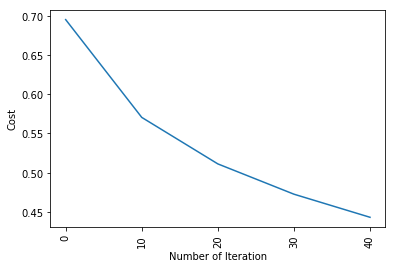

test accuracy: 90.85173501577287 %


In [19]:
#Logistic Regression

def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train.shape[0]  # that is 20
    w,b = initialize_weights_and_bias(dimension)
    # do not change learning rate
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)

    # Print train/test Errors
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 1, num_iterations = 50) 

Cost after iteration 0: 0.695733
Cost after iteration 10: 0.570587
Cost after iteration 20: 0.511070
Cost after iteration 30: 0.472310
Cost after iteration 40: 0.442741
Cost after iteration 50: 0.418369
Cost after iteration 60: 0.397485
Cost after iteration 70: 0.379209
Cost after iteration 80: 0.363009
Cost after iteration 90: 0.348522
Cost after iteration 100: 0.335479
Cost after iteration 110: 0.323672
Cost after iteration 120: 0.312932
Cost after iteration 130: 0.303120
Cost after iteration 140: 0.294122
Cost after iteration 150: 0.285840
Cost after iteration 160: 0.278192
Cost after iteration 170: 0.271109
Cost after iteration 180: 0.264530
Cost after iteration 190: 0.258403


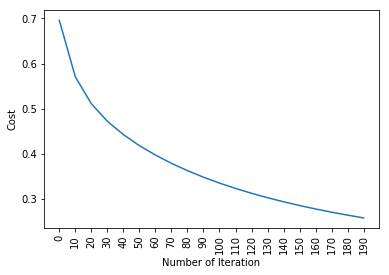

test accuracy: 95.89905362776025 %


In [20]:
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 1, num_iterations = 200) 

Cost after iteration 0: 0.695733
Cost after iteration 10: 0.570587
Cost after iteration 20: 0.511070
Cost after iteration 30: 0.472310
Cost after iteration 40: 0.442741
Cost after iteration 50: 0.418369
Cost after iteration 60: 0.397485
Cost after iteration 70: 0.379209
Cost after iteration 80: 0.363009
Cost after iteration 90: 0.348522
Cost after iteration 100: 0.335479
Cost after iteration 110: 0.323672
Cost after iteration 120: 0.312932
Cost after iteration 130: 0.303120
Cost after iteration 140: 0.294122
Cost after iteration 150: 0.285840
Cost after iteration 160: 0.278192
Cost after iteration 170: 0.271109
Cost after iteration 180: 0.264530
Cost after iteration 190: 0.258403
Cost after iteration 200: 0.252683
Cost after iteration 210: 0.247332
Cost after iteration 220: 0.242314
Cost after iteration 230: 0.237600
Cost after iteration 240: 0.233163
Cost after iteration 250: 0.228979
Cost after iteration 260: 0.225027
Cost after iteration 270: 0.221289
Cost after iteration 280: 0.217

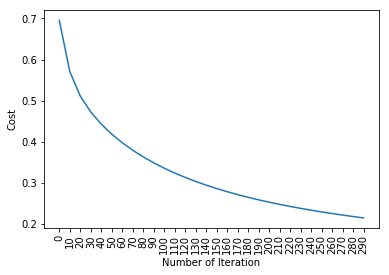

test accuracy: 97.1608832807571 %


In [21]:
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 1, num_iterations = 300)  

Cost after iteration 0: 0.695733
Cost after iteration 10: 0.570587
Cost after iteration 20: 0.511070
Cost after iteration 30: 0.472310
Cost after iteration 40: 0.442741
Cost after iteration 50: 0.418369
Cost after iteration 60: 0.397485
Cost after iteration 70: 0.379209
Cost after iteration 80: 0.363009
Cost after iteration 90: 0.348522
Cost after iteration 100: 0.335479
Cost after iteration 110: 0.323672
Cost after iteration 120: 0.312932
Cost after iteration 130: 0.303120
Cost after iteration 140: 0.294122
Cost after iteration 150: 0.285840
Cost after iteration 160: 0.278192
Cost after iteration 170: 0.271109
Cost after iteration 180: 0.264530
Cost after iteration 190: 0.258403
Cost after iteration 200: 0.252683
Cost after iteration 210: 0.247332
Cost after iteration 220: 0.242314
Cost after iteration 230: 0.237600
Cost after iteration 240: 0.233163
Cost after iteration 250: 0.228979
Cost after iteration 260: 0.225027
Cost after iteration 270: 0.221289
Cost after iteration 280: 0.217

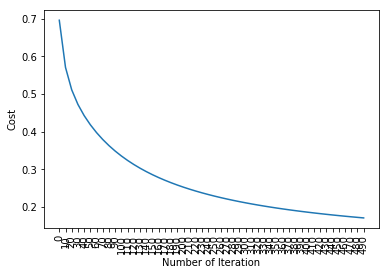

test accuracy: 97.79179810725552 %


In [22]:
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 1, num_iterations = 500)  

Cost after iteration 0: 0.695733
Cost after iteration 10: 0.875272
Cost after iteration 20: 0.585129
Cost after iteration 30: 0.436909
Cost after iteration 40: 0.367094
Cost after iteration 50: 0.329533
Cost after iteration 60: 0.306327
Cost after iteration 70: 0.288475
Cost after iteration 80: 0.273405
Cost after iteration 90: 0.260430
Cost after iteration 100: 0.249134
Cost after iteration 110: 0.239211
Cost after iteration 120: 0.230425
Cost after iteration 130: 0.222594
Cost after iteration 140: 0.215570
Cost after iteration 150: 0.209236
Cost after iteration 160: 0.203495
Cost after iteration 170: 0.198269
Cost after iteration 180: 0.193492
Cost after iteration 190: 0.189109
Cost after iteration 200: 0.185073
Cost after iteration 210: 0.181344
Cost after iteration 220: 0.177890
Cost after iteration 230: 0.174681
Cost after iteration 240: 0.171692
Cost after iteration 250: 0.168902
Cost after iteration 260: 0.166290
Cost after iteration 270: 0.163841
Cost after iteration 280: 0.161

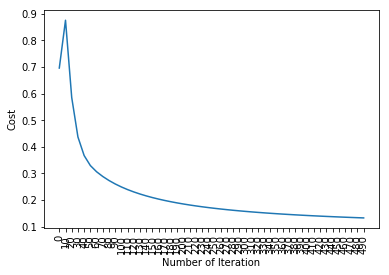

test accuracy: 97.94952681388013 %


In [23]:
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 2, num_iterations = 500)  

Cost after iteration 0: 0.695733
Cost after iteration 10: 0.619011
Cost after iteration 20: 0.571319
Cost after iteration 30: 0.537510
Cost after iteration 40: 0.511622
Cost after iteration 50: 0.490577
Cost after iteration 60: 0.472709
Cost after iteration 70: 0.457061
Cost after iteration 80: 0.443057
Cost after iteration 90: 0.430332
Cost after iteration 100: 0.418642
Cost after iteration 110: 0.407817
Cost after iteration 120: 0.397734
Cost after iteration 130: 0.388301
Cost after iteration 140: 0.379444
Cost after iteration 150: 0.371104
Cost after iteration 160: 0.363233
Cost after iteration 170: 0.355789
Cost after iteration 180: 0.348737
Cost after iteration 190: 0.342045
Cost after iteration 200: 0.335686
Cost after iteration 210: 0.329635
Cost after iteration 220: 0.323871
Cost after iteration 230: 0.318372
Cost after iteration 240: 0.313122
Cost after iteration 250: 0.308104
Cost after iteration 260: 0.303303
Cost after iteration 270: 0.298705
Cost after iteration 280: 0.294

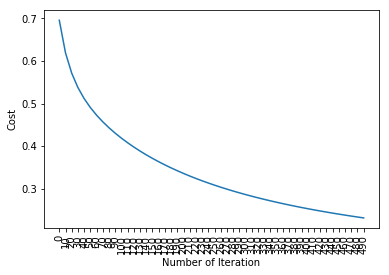

test accuracy: 97.0031545741325 %


In [24]:
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.5, num_iterations = 500) 

### 4.7. Logisic Regression With Sklearn
<a id="4.7"></a>

In [25]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

lr.fit(x_train.T,y_train.T)
print("test accuracy {}".format(lr.score(x_test.T,y_test.T))) 
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

test accuracy 0.9810725552050473


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## 5. Conclusion
<a id="5"></a>

We are following those steps for ML.